<a href="https://colab.research.google.com/github/apoorvds99/Apoorvs-Smart-Number-Assistant/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df =pd.read_csv("IPL.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [ ]:
#Chceking number of rows and column.
print(f"We have {df.shape[0]}rows and {df.shape[1]}columns in our IPL data.")

We have 74rows and 20columns in our IPL data.


In [ ]:
#Checking null value if any.
df.isnull().sum()

,0
match_id,0
date,0
venue,0
team1,0
team2,0
stage,0
toss_winner,0
toss_decision,0
first_ings_score,0
first_ings_wkts,0


Text(0, 0.5, 'Teams')

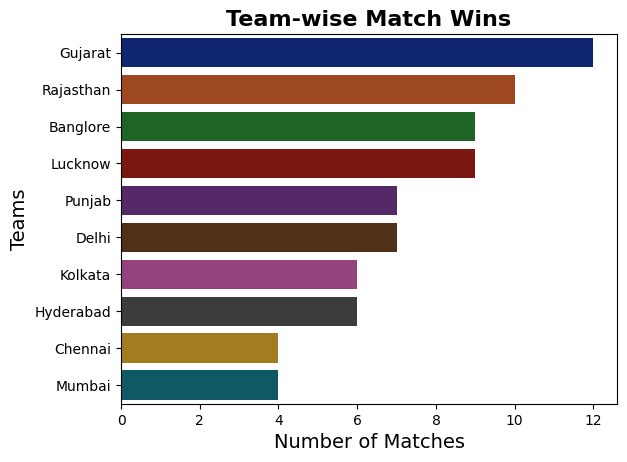

In [ ]:
#Match_Wins

match_wins = df["match_winner"].value_counts()
sns.barplot(x= match_wins.values, y= match_wins.index, palette= "dark")
plt.title("Team-wise Match Wins", fontsize= 16, fontweight= "bold")
plt.xlabel("Number of Matches", fontsize= 14)
plt.ylabel("Teams", fontsize= 14)

Text(0, 0.5, 'Count')

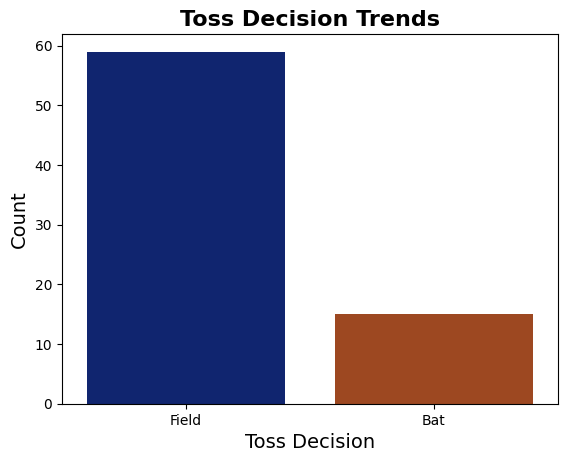

In [ ]:
#Toss_Decision

sns.countplot(x= df["toss_decision"], palette= "dark")
plt.title("Toss Decision Trends", fontsize= 16, fontweight= "bold")
plt.xlabel("Toss Decision", fontsize= 14)
plt.ylabel("Count",fontsize= 14)

In [99]:
#Toss_winner Vs Match_winner

count= df[df["toss_winner"] == df["match_winner"]]["match_id"].count()
percentage = (count * 100)/df.shape[0]
print(f"{percentage.round(2)}% times team won toss but did not win the match.")

48.65% times team won toss but did not win the match.


Batting first or chasing does not consistently dominate, impact varies by conditions.


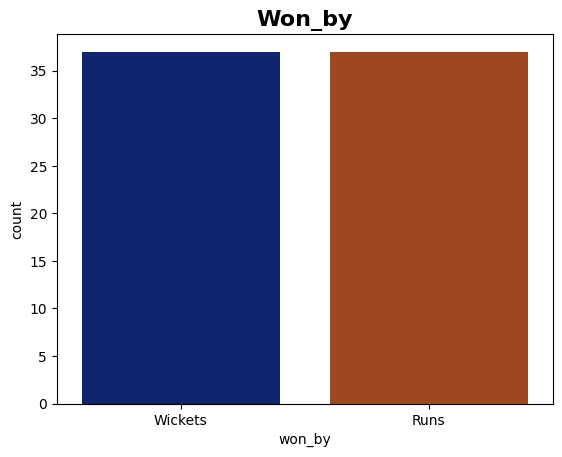

In [100]:
#Team_wins(Runs Vs Wickets)

sns.countplot(x = df["won_by"], palette="dark")
plt.title("Won_by", fontsize= 16, fontweight="bold")


print("Batting first or chasing does not consistently dominate, impact varies by conditions.")

Text(0, 0.5, 'Player of the match')

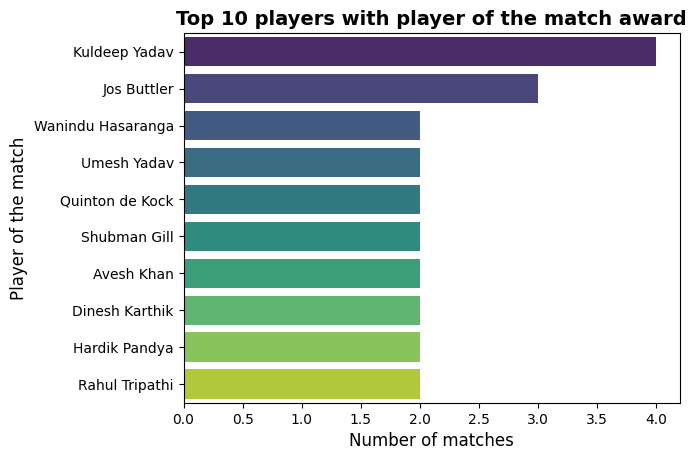

In [ ]:
#Most "Player of the Match" Awards

count= df["player_of_the_match"].value_counts().head(10)
sns.barplot(x= count.values, y= count.index, palette="viridis")
plt.title("Top 10 players with player of the match award", fontsize= 14, fontweight="bold")
plt.xlabel("Number of matches", fontsize= 12)
plt.ylabel("Player of the match", fontsize= 12)

Text(0, 0.5, 'Players Name')

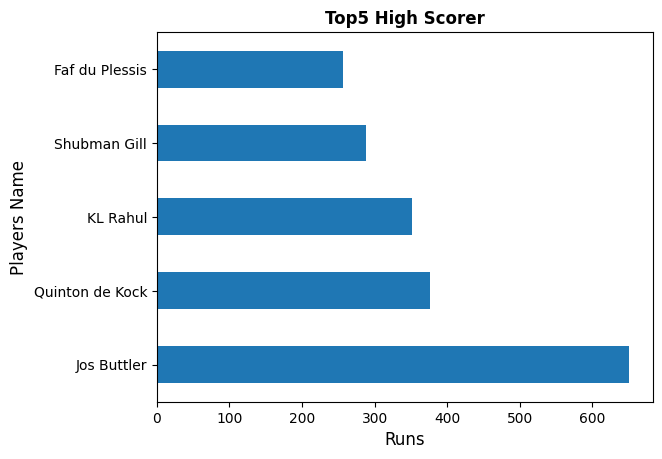

In [ ]:
#5_Top_Scorer


top_score = df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(5)
top_score.plot(kind="barh")
plt.title("Top5 High Scorer", fontweight= "bold")
plt.xlabel("Runs", fontsize=12)
plt.ylabel("Players Name", fontsize=12)

Text(0, 0.5, 'Players Name')

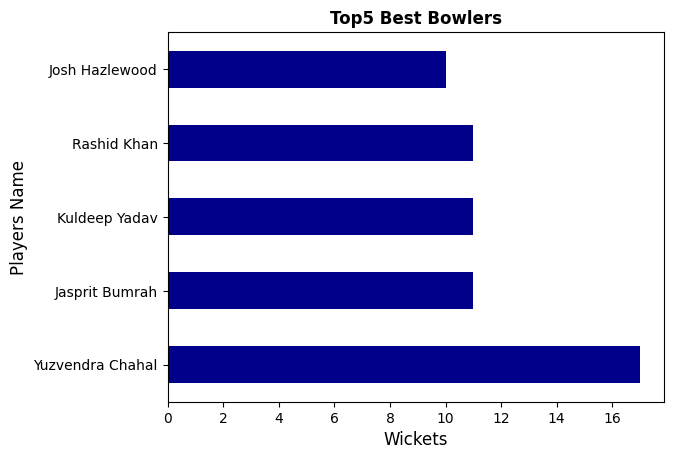

In [ ]:
#Top5_best_bowling_figure

df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0])
df['highest_wickets'] = df['highest_wickets'].astype(int)

top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(5)
top_bowlers.plot(kind="barh", color= "darkblue")
plt.title("Top5 Best Bowlers", fontweight= "bold")
plt.xlabel("Wickets", fontsize=12)
plt.ylabel("Players Name", fontsize=12)


Text(0, 0.5, 'Name of Venue')

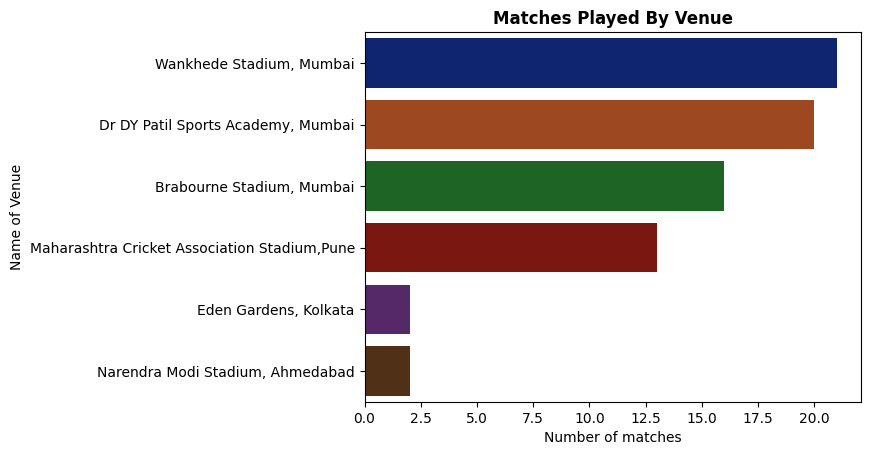

In [72]:
#Most Matches Played by Venue

venue_count = df['venue'].value_counts()
venue_count
sns.barplot(x= venue_count.values, y= venue_count.index, palette="dark")
plt.title("Matches Played By Venue", fontweight= 'bold')
plt.xlabel("Number of matches")
plt.ylabel("Name of Venue")

In [85]:
#Highest margin win by runs.

df[df['won_by'] == 'Runs'].sort_values(by = 'margin', ascending=False).head(1)[['match_winner','margin']]


,match_winner,margin
54,Chennai,91


In [90]:
#Highest Individual Score

df[df['highscore'] == df['highscore'].max()][['top_scorer', 'highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [97]:
#Best Bowling Figures

df[df['highest_wickets'] == df["highest_wickets"].max()][['best_bowling', 'best_bowling_figure']]



,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
